# Modelo de Regresion Logistica Binaria

In [622]:
# Librerias
import pandas as pd
import numpy as np

# Datos Preprocesados de train_data

In [623]:
# cargar datos preprocesados
df = pd.read_csv('../Datos_Hackaton/train_data_preparado_.csv', sep=';')
df

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,25/11/1999,140011,990,75,25/01/2018,Soltero,0
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,16/10/1996,182774,990,81,24/07/2021,Soltero,1
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,29/01/1971,682106,960,74,13/07/2016,Viudo,0
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,28/04/1992,270232,960,82,21/07/2014,Soltero,1
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,3/05/1992,266804,950,82,22/07/2014,Soltero,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,100824,1021470,1,Presencial,651,8,Mujer,Portal Web,15,2/02/1975,294641,120,79,16/03/2022,Soltero,1
1991,103863,1021470,1,Presencial,652,8,Mujer,Portal Web,15,15/03/1975,301334,120,79,18/03/2022,Soltero,1
1992,102945,1021540,1,Presencial,121,1,Hombre,Portal Web,6,3/07/1967,738060,120,77,2/05/2023,Divorciado,0
1993,103973,1021570,1,Presencial,4735,2,Mujer,Linkedin,12,22/09/1968,715749,110,81,23/06/2022,Soltero,1


In [624]:
df_prep = df.copy(deep=True)

## Obtener Edad de ingreso de los empleados

In [625]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df_prep['fecha_incorporacion'] = pd.to_datetime(df_prep['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df_prep['fecha_nacimiento'] = pd.to_datetime(df_prep['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df_prep['year_nacimiento'] = df_prep['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df_prep['year_incorporacion'] = df_prep['fecha_incorporacion'].dt.year.astype(int)

# eliminar fecha_incorporacion
df_prep = df_prep.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df_prep = df_prep.drop('fecha_nacimiento', axis=1)

# obtener edad de los empleados
df_prep['edad_ingreso'] = df_prep['year_incorporacion'] - df_prep['year_nacimiento']

# eliminar year_nacimiento
df_prep = df_prep.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df_prep = df_prep.drop('year_incorporacion', axis=1)

# mostrar resultados
df_prep.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
0,100247,1020740,1,Híbrida,176,1,Mujer,Ferias & Networking,1,140011,990,75,Soltero,0,19
1,103355,1021150,1,Híbrida,76,2,Hombre,Ferias & Networking,2,182774,990,81,Soltero,1,25
2,100669,1020600,1,Híbrida,495,3,Mujer,Referidos,11,682106,960,74,Viudo,0,45
3,103760,1020620,1,Híbrida,1303,2,Hombre,Linkedin,2,270232,960,82,Soltero,1,22
4,100965,1020620,1,Híbrida,13045,2,Hombre,Linkedin,2,266804,950,82,Soltero,0,22


## Convertir variables categoricas binarias a numericas

In [626]:
# librerias
from sklearn.preprocessing import LabelEncoder

# creamos una clase LabelEncoder
le = LabelEncoder()

### Genero

In [627]:
# pasamos la variable a convertir a la clase antes definida
df_prep['genero'] = le.fit_transform(df_prep['genero'])

# mostramos resultados
df_prep.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
0,100247,1020740,1,Híbrida,176,1,1,Ferias & Networking,1,140011,990,75,Soltero,0,19
1,103355,1021150,1,Híbrida,76,2,0,Ferias & Networking,2,182774,990,81,Soltero,1,25
2,100669,1020600,1,Híbrida,495,3,1,Referidos,11,682106,960,74,Viudo,0,45
3,103760,1020620,1,Híbrida,1303,2,0,Linkedin,2,270232,960,82,Soltero,1,22
4,100965,1020620,1,Híbrida,13045,2,0,Linkedin,2,266804,950,82,Soltero,0,22


### Modalidad trabajo

In [628]:
df_prep['modalidad_trabajo'].unique()

array(['Híbrida', 'Presencial'], dtype=object)

In [629]:
# pasamos la variable a convertir a la clase antes definida
df_prep['modalidad_trabajo'] = le.fit_transform(df_prep['modalidad_trabajo'])

# mostramos resultados
df_prep.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
0,100247,1020740,1,0,176,1,1,Ferias & Networking,1,140011,990,75,Soltero,0,19
1,103355,1021150,1,0,76,2,0,Ferias & Networking,2,182774,990,81,Soltero,1,25
2,100669,1020600,1,0,495,3,1,Referidos,11,682106,960,74,Viudo,0,45
3,103760,1020620,1,0,1303,2,0,Linkedin,2,270232,960,82,Soltero,1,22
4,100965,1020620,1,0,13045,2,0,Linkedin,2,266804,950,82,Soltero,0,22


### Canal de Reclutamiento y Estado Civil

In [630]:
# Librerias
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing

In [631]:
transformer = sklearn.compose.make_column_transformer(

    # transformacion                         variables a transformar
    (sklearn.preprocessing.OneHotEncoder(), ['canal_reclutamiento', 'estado_civil']),
    
    # mantener sin cambio las variables no seleccionadas
    remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['canal_reclutamiento', 'estado_civil'])])

In [632]:
df_prep =(
    pd.DataFrame(
        transformer.fit_transform(df_prep),
        columns=transformer.get_feature_names_out(),
        index=df_prep.index
    )
    .rename(
        columns=lambda x: x.replace('remainder__', '').replace('onehotencoder__', '')
    )
    
)

df_prep

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_colaborador,...,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100247.0,...,0.0,176.0,1.0,1.0,1.0,140011.0,990.0,75.0,0.0,19.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,103355.0,...,0.0,76.0,2.0,0.0,2.0,182774.0,990.0,81.0,1.0,25.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,100669.0,...,0.0,495.0,3.0,1.0,11.0,682106.0,960.0,74.0,0.0,45.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,103760.0,...,0.0,1303.0,2.0,0.0,2.0,270232.0,960.0,82.0,1.0,22.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,100965.0,...,0.0,13045.0,2.0,0.0,2.0,266804.0,950.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,100824.0,...,1.0,651.0,8.0,1.0,15.0,294641.0,120.0,79.0,1.0,47.0
1991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,103863.0,...,1.0,652.0,8.0,1.0,15.0,301334.0,120.0,79.0,1.0,47.0
1992,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,102945.0,...,1.0,121.0,1.0,0.0,6.0,738060.0,120.0,77.0,0.0,56.0
1993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,103973.0,...,1.0,4735.0,2.0,1.0,12.0,715749.0,110.0,81.0,1.0,54.0


# Analisis de datos de train

In [633]:
df_prep

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_colaborador,...,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100247.0,...,0.0,176.0,1.0,1.0,1.0,140011.0,990.0,75.0,0.0,19.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,103355.0,...,0.0,76.0,2.0,0.0,2.0,182774.0,990.0,81.0,1.0,25.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,100669.0,...,0.0,495.0,3.0,1.0,11.0,682106.0,960.0,74.0,0.0,45.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,103760.0,...,0.0,1303.0,2.0,0.0,2.0,270232.0,960.0,82.0,1.0,22.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,100965.0,...,0.0,13045.0,2.0,0.0,2.0,266804.0,950.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,100824.0,...,1.0,651.0,8.0,1.0,15.0,294641.0,120.0,79.0,1.0,47.0
1991,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,103863.0,...,1.0,652.0,8.0,1.0,15.0,301334.0,120.0,79.0,1.0,47.0
1992,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,102945.0,...,1.0,121.0,1.0,0.0,6.0,738060.0,120.0,77.0,0.0,56.0
1993,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,103973.0,...,1.0,4735.0,2.0,1.0,12.0,715749.0,110.0,81.0,1.0,54.0


In [634]:
# eliminamos id_colaborador ya que no contribuye al analisis
df_prep.drop('id_colaborador',axis=1,inplace=True)

## Analisis de Correlacion

In [635]:
import matplotlib.pyplot as plt

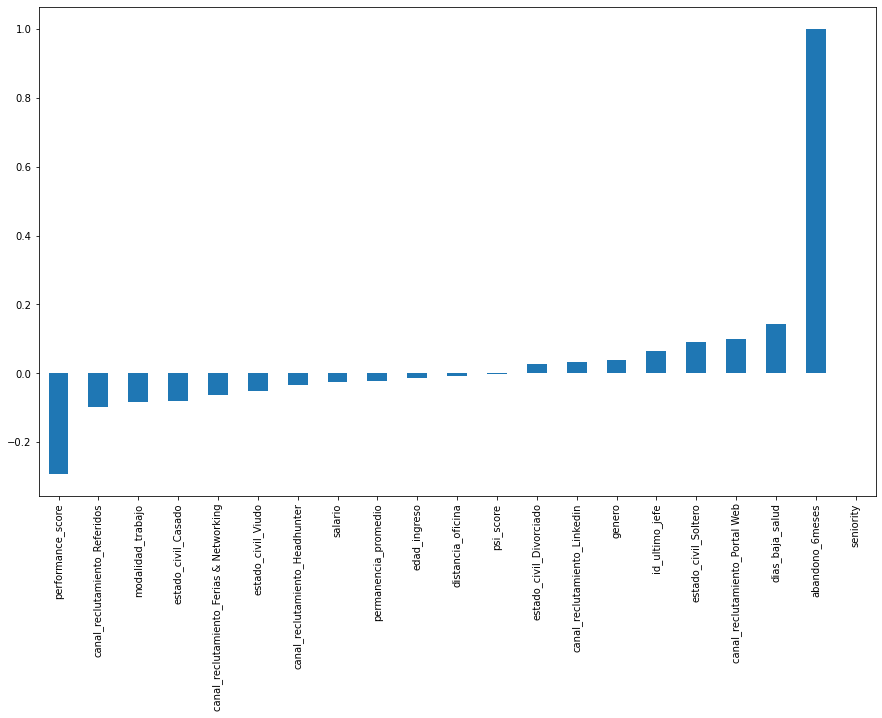

In [636]:
fig = plt.figure(figsize=(15,9))
df_prep.corr()['abandono_6meses'].sort_values(ascending=True).plot(kind='bar')
plt.show()

Variables con mayor correlacion
- performance score
- dias baja salud
- modalidad trabajo
- id ultimo jefe

## Seleccion de variables predictoras y objetivo

In [637]:
df_prep.head()

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_ultimo_jefe,...,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1020740.0,...,0.0,176.0,1.0,1.0,1.0,140011.0,990.0,75.0,0.0,19.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1021150.0,...,0.0,76.0,2.0,0.0,2.0,182774.0,990.0,81.0,1.0,25.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1020600.0,...,0.0,495.0,3.0,1.0,11.0,682106.0,960.0,74.0,0.0,45.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1020620.0,...,0.0,1303.0,2.0,0.0,2.0,270232.0,960.0,82.0,1.0,22.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1020620.0,...,0.0,13045.0,2.0,0.0,2.0,266804.0,950.0,82.0,0.0,22.0


In [638]:
# variables predictoras
X = df_prep.loc[:, ['performance_score','dias_baja_salud','modalidad_trabajo','id_ultimo_jefe']]

# variables objetivo
y = df_prep['abandono_6meses'].values

X

,performance_score,dias_baja_salud,modalidad_trabajo,id_ultimo_jefe
0,990.0,1.0,0.0,1020740.0
1,990.0,2.0,0.0,1021150.0
2,960.0,3.0,0.0,1020600.0
3,960.0,2.0,0.0,1020620.0
4,950.0,2.0,0.0,1020620.0
...,...,...,...,...
1990,120.0,8.0,1.0,1021470.0
1991,120.0,8.0,1.0,1021470.0
1992,120.0,1.0,1.0,1021540.0
1993,110.0,2.0,1.0,1021570.0


## Escalar los datos

In [639]:
# libreria para escalar datos
from sklearn.preprocessing import MinMaxScaler

In [640]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xs =  scaler.fit_transform(X)

In [641]:
# pasamos las variables predictoras a un dataframe
Xs = pd.DataFrame(Xs)

Xs

,0,1,2,3
0,1.000000,0.028571,0.0,0.430233
1,1.000000,0.057143,0.0,0.668605
2,0.967033,0.085714,0.0,0.348837
3,0.967033,0.057143,0.0,0.360465
4,0.956044,0.057143,0.0,0.360465
...,...,...,...,...
1990,0.043956,0.228571,1.0,0.854651
1991,0.043956,0.228571,1.0,0.854651
1992,0.043956,0.028571,1.0,0.895349
1993,0.032967,0.057143,1.0,0.912791


In [642]:
# recuperamos los nombres de las variables predictoras
Xs.columns = X.columns
Xs

,performance_score,dias_baja_salud,modalidad_trabajo,id_ultimo_jefe
0,1.000000,0.028571,0.0,0.430233
1,1.000000,0.057143,0.0,0.668605
2,0.967033,0.085714,0.0,0.348837
3,0.967033,0.057143,0.0,0.360465
4,0.956044,0.057143,0.0,0.360465
...,...,...,...,...
1990,0.043956,0.228571,1.0,0.854651
1991,0.043956,0.228571,1.0,0.854651
1992,0.043956,0.028571,1.0,0.895349
1993,0.032967,0.057143,1.0,0.912791


# Datos Preprocesados de test_data

In [643]:
df_test = pd.read_csv('../Datos_Hackaton/test_data_preparado.csv', sep=',')
df_test.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


## Obtener Edad de ingreso de los empleados

In [644]:
# copia del dataframe
df_X = df_test.copy(deep=True)
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,19/01/1997,181654,99,81,24/07/2021,Soltero
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,20/08/1999,140986,97,75,27/01/2018,Soltero
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,29/10/1984,406690,96,69,24/04/2022,Soltero
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,9/11/1992,249107,95,73,23/05/2023,Casado
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,14/07/1969,698318,95,81,20/06/2015,Viudo


In [645]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df_X['fecha_incorporacion'] = pd.to_datetime(df_X['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df_X['fecha_nacimiento'] = pd.to_datetime(df_X['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df_X['year_nacimiento'] = df_X['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df_X['year_incorporacion'] = df_X['fecha_incorporacion'].dt.year.astype(int)

# eliminar fecha_incorporacion
df_X = df_X.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df_X = df_X.drop('fecha_nacimiento', axis=1)

df_X['edad_ingreso'] = df_X['year_incorporacion'] - df_X['year_nacimiento']

# eliminar year_nacimiento
df_X = df_X.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df_X = df_X.drop('year_incorporacion', axis=1)

# mostrar resultados
df_X.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,edad_ingreso
0,100486,102115.0,1,Híbrida,0.795,2,Hombre,Ferias & Networking,2,181654,99,81,Soltero,24
1,103752,102074.0,1,Híbrida,1.715,1,Mujer,Ferias & Networking,1,140986,97,75,Soltero,19
2,103937,102150.0,1,Híbrida,2.375,1,Hombre,Portal Web,6,406690,96,69,Soltero,38
3,101744,102172.0,1,Híbrida,2.185,3,Hombre,Linkedin,3,249107,95,73,Casado,31
4,101037,102060.0,1,Híbrida,4.660,3,Hombre,Referidos,10,698318,95,81,Viudo,46


## Convertir variables categoricas a numericas

In [646]:
# librerias
from sklearn.preprocessing import LabelEncoder

# creamos una clase LabelEncoder
le = LabelEncoder()

In [647]:
# pasamos la variable a convertir a la clase antes definida
df_X['genero'] = le.fit_transform(df_X['genero'])

# pasamos la variable a convertir a la clase antes definida
df_X['modalidad_trabajo'] = le.fit_transform(df_X['modalidad_trabajo'])

In [648]:
# Librerias
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing

transformer = sklearn.compose.make_column_transformer(

    # transformacion                         variables a transformar
    (sklearn.preprocessing.OneHotEncoder(), ['canal_reclutamiento', 'estado_civil']),
    
    # mantener sin cambio las variables no seleccionadas
    remainder='passthrough'
)

df_X =(
    pd.DataFrame(
        transformer.fit_transform(df_X),
        columns=transformer.get_feature_names_out(),
        index=df_X.index
    )
    .rename(
        columns=lambda x: x.replace('remainder__', '').replace('onehotencoder__', '')
    )
    
)

df_X

,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,id_colaborador,...,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100486.0,...,1.0,0.0,0.795,2.0,0.0,2.0,181654.0,99.0,81.0,24.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,103752.0,...,1.0,0.0,1.715,1.0,1.0,1.0,140986.0,97.0,75.0,19.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,103937.0,...,1.0,0.0,2.375,1.0,0.0,6.0,406690.0,96.0,69.0,38.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,101744.0,...,1.0,0.0,2.185,3.0,0.0,3.0,249107.0,95.0,73.0,31.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,101037.0,...,1.0,0.0,4.660,3.0,0.0,10.0,698318.0,95.0,81.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,103755.0,...,1.0,1.0,2.995,2.0,1.0,16.0,700814.0,90.0,69.0,53.0
2016,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,103976.0,...,1.0,1.0,2.775,0.0,1.0,5.0,677071.0,93.0,66.0,53.0
2017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,104115.0,...,1.0,1.0,3.990,1.0,0.0,7.0,876285.0,84.0,69.0,53.0
2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,103920.0,...,1.0,1.0,7.100,1.0,1.0,8.0,719102.0,91.0,75.0,55.0


## Seleccion de variables

In [649]:
# variables predictoras
df_X = df_X.loc[:, ['performance_score','dias_baja_salud','modalidad_trabajo','id_ultimo_jefe']]
df_X

,performance_score,dias_baja_salud,modalidad_trabajo,id_ultimo_jefe
0,99.0,2.0,0.0,102115.0
1,97.0,1.0,0.0,102074.0
2,96.0,1.0,0.0,102150.0
3,95.0,3.0,0.0,102172.0
4,95.0,3.0,0.0,102060.0
...,...,...,...,...
2015,90.0,2.0,1.0,102161.0
2016,93.0,0.0,1.0,102171.0
2017,84.0,1.0,1.0,102144.0
2018,91.0,1.0,1.0,102152.0


## Escalar datos de Test

In [650]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xt =  scaler.fit_transform(df_X)

In [651]:
# pasamos las variables predictoras a un dataframe
Xt = pd.DataFrame(Xt)

# recuperamos los nombres de las variables predictoras
Xt.columns = df_X.columns
Xt

,performance_score,dias_baja_salud,modalidad_trabajo,id_ultimo_jefe
0,1.000000,0.086957,0.0,0.668605
1,0.894737,0.043478,0.0,0.430233
2,0.842105,0.043478,0.0,0.872093
3,0.789474,0.130435,0.0,1.000000
4,0.789474,0.130435,0.0,0.348837
...,...,...,...,...
2015,0.526316,0.086957,1.0,0.936047
2016,0.684211,0.000000,1.0,0.994186
2017,0.210526,0.043478,1.0,0.837209
2018,0.578947,0.043478,1.0,0.883721


# Entrenamiento del Modelo

In [652]:
# dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size=0.2, random_state=42)

In [653]:
# llamada del modelo
from sklearn.linear_model import LogisticRegression

# instanciamos el modelo en una variable
model = LogisticRegression()

# entrenamos el modelo con los datos de entrenamiento
result = model.fit(X_train, y_train)

In [654]:
# llamamos las metricas del modelo
from sklearn import metrics

# creamos la prediccion
prediction_test = model.predict(X_test)

# mostramos la metrica de precision de la prediccion versus el valor real
print('Accuracy: ',metrics.accuracy_score(y_test,prediction_test))

Accuracy:  0.7017543859649122


# Evaluacion del Modelo

AxesSubplot(0.125,0.125;0.775x0.755)


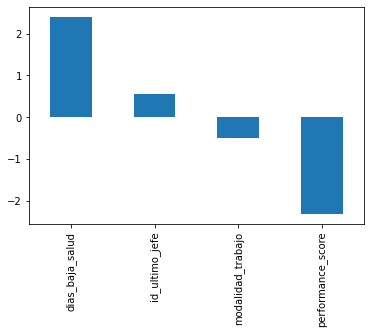

In [655]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'));

AxesSubplot(0.125,0.125;0.775x0.755)


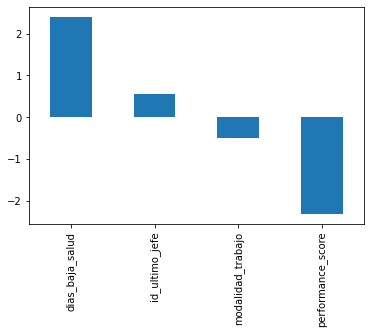

In [656]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [657]:
# llamamos el metodo para crear la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 792x792 with 0 Axes>

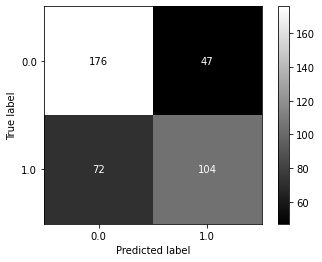

In [658]:
# Size de la grafica
fig = plt.figure(figsize=(11,11))

# creacion de la matriz
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)

# visualizacion de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [659]:
# Calcular métricas a partir de la matriz de confusión
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [660]:
# Calcular precisión, sensibilidad, especificidad, y tasa de error
precision = TP / (TP + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
tasa_error = (FP + FN) / (TP + TN + FP + FN)

# Imprimir las métricas
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Tasa de Error:", tasa_error)
print('f1-score: ',(2*precision*sensibilidad)/(precision + sensibilidad))

Precisión: 0.6887417218543046
Sensibilidad: 0.5909090909090909
Especificidad: 0.7892376681614349
Tasa de Error: 0.2982456140350877
f1-score:  0.636085626911315


# Prediccion del modelo para test_data

In [664]:
# creamos la nueva prediccion
prediction_test = model.predict(Xt)

In [665]:
# convertimos las predicciones a un dataframe
df_pred = pd.DataFrame(prediction_test, columns=['abandono_6meses'])
df_pred.head()

,abandono_6meses
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [666]:
# trae los valores originales de id_colaborador al nuevo dataframe
df_pred['ID'] = df_test['id_colaborador'].values

# reordenar variables
df_pred = df_pred[['ID','abandono_6meses']]

df_pred

,ID,abandono_6meses
0,100486,0.0
1,103752,0.0
2,103937,0.0
3,101744,1.0
4,101037,0.0
...,...,...
2015,103755,1.0
2016,103976,0.0
2017,104115,1.0
2018,103920,0.0


In [668]:
df_pred['abandono_6meses'] = df_pred['abandono_6meses'].astype(int)
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2020 non-null   int64
 1   abandono_6meses  2020 non-null   int64
dtypes: int64(2)
memory usage: 31.7 KB


# Exportar Predicciones

In [669]:
# exportar predicciones
#df_pred.to_csv('submission_2.csv', index=False)